# Investment Analysis Assignment

# Checkpoints - Part 1

Checkpoint 1: Data Cleaning 1

# Table 1.1 : Understand the Data Set 

importing required modules

In [1]:
import numpy as np, pandas as pd

Loading companies and rounds data into companies and round2 from base directory of local machine.

In [2]:
base_dir = 'D:\\SKM\\BB_TERMINATOR\GYAN_LAB_2018\\IIITB_U_AIML\AIML\\CaseStudy1_InvestmentCaseStudy\\'
companies_file = base_dir + 'companies.txt'
rounds_file = base_dir + 'rounds2.csv'

creating data frame companies and rounds2

In [3]:
companies = pd.read_csv(companies_file,sep="\t", encoding = 'palmos')
rounds2 = pd.read_csv(rounds_file, encoding = 'palmos')

Total companies without cleaning rounds2 data frame

In [4]:
#rounds2.company_permalink.sort_values()
r2_total = rounds2['company_permalink']  # total companies with repetition
r2_total.count()

114949

Unique companies without cleaning rounds2 data frame

In [5]:
r2_total_u = rounds2.groupby('company_permalink').company_permalink.nunique() #total compnies without repetition
r2_total_u.count()

90247

cleaning rounds2 column data series

In [6]:
rounds2['company_permalink']  = rounds2['company_permalink'].str.upper()

Total companies in cleaned rounds2 data series

In [7]:
r2_clean_total = rounds2['company_permalink']  # total companies with repetition
r2_clean_total.count()

114949

Unique companies in cleaned rounds2 data series

In [8]:
r2_clean_total_u = rounds2.groupby('company_permalink').company_permalink.nunique() #total compnies without repetition
r2_clean_total_u.count()

66368

Total companies without cleaning companies data frame

In [9]:
comp_total = companies['permalink']  # total companies with repetition
comp_total.count()

66368

Total unique companies without cleaning companies data series

In [10]:
comp_total_u = companies.groupby('permalink').name.nunique() #total compnies without repetition
comp_total_u.count()

66368

Cleaning companies data series

In [11]:
companies['permalink']  = companies['permalink'].str.upper()

Total companies after cleaning companies data series

In [12]:
comp_clean_total = companies['permalink']  # total companies with repetition
comp_clean_total.count()

66368

Unique companies after cleaning companies data series

In [13]:
comp_clean_total_u = companies.groupby('permalink').permalink.nunique() #total compnies without repetition
comp_clean_total_u.count()

66368

creating master data frame by merging companies and rounds2 data frame to get total observations in master frame

renaming companies permalink column to company_permalink to merge

In [14]:
rounds2 = rounds2.rename(columns={'company_permalink':'permalink'}, index = str )

In [15]:
rounds2.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


Merging the two data frames to create master frame

In [16]:
master_frame=pd.merge(rounds2, companies, how='inner', on = 'permalink')

In [17]:
master_frame['permalink'].count()

114875

Checkpoint 2: Funding Type Analysis

# Table 2.1 : Average Values of Investments for Each of these Funding Types

handling missing data in master frame

In [18]:
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [19]:
master_frame.isnull().sum()

permalink                      0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83743
funded_at                      0
raised_amount_usd          19960
name                           1
homepage_url                6126
category_list               3387
status                         0
country_code                8637
state_code                 10903
region                     10126
city                       10123
founded_at                 20488
dtype: int64

In [20]:
master_frame.isnull().all(axis=1).sum()

0

In [21]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.90
funded_at                   0.00
raised_amount_usd          17.38
name                        0.00
homepage_url                5.33
category_list               2.95
status                      0.00
country_code                7.52
state_code                  9.49
region                      8.81
city                        8.81
founded_at                 17.84
dtype: float64

dropping columns which are not participating in the analysis and removing NaN rows

In [22]:
master_frame = master_frame.drop('funding_round_code', axis = 1)
master_frame = master_frame.drop('region', axis = 1)
master_frame = master_frame.drop('homepage_url', axis = 1)
master_frame = master_frame.drop('founded_at', axis = 1)
master_frame = master_frame.drop('state_code', axis = 1)
master_frame = master_frame.dropna(subset=['city', 'category_list'])

looking for still missing data in %

In [24]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                  0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
city                       0.0
dtype: float64

In [25]:
master_frame.count()

permalink                  87326
funding_round_permalink    87326
funding_round_type         87326
funded_at                  87326
raised_amount_usd          87326
name                       87325
category_list              87326
status                     87326
country_code               87326
city                       87326
dtype: int64

In [26]:
master_frame.loc[:,'raised_amount_usd'].describe()

count    8.732600e+04
mean     1.039247e+07
std      1.108338e+08
min      0.000000e+00
25%      3.750000e+05
50%      1.800000e+06
75%      7.100000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

imputing missing data in raised_amount_usd with the mean value, mean of funding type would be more precise but to time constraint lets use mean value of raised_amount_usd as a whole 

In [27]:
master_frame.loc[np.isnan(master_frame['raised_amount_usd']), ['raised_amount_usd']] = master_frame['raised_amount_usd'].mean()

In [28]:
master_frame.count()

permalink                  87326
funding_round_permalink    87326
funding_round_type         87326
funded_at                  87326
raised_amount_usd          87326
name                       87325
category_list              87326
status                     87326
country_code               87326
city                       87326
dtype: int64

In [29]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                  0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
city                       0.0
dtype: float64

In [30]:
master_frame.groupby('funding_round_type').mean().sort_values('raised_amount_usd',ascending=False)

,raised_amount_usd
funding_round_type,
post_ipo_debt,1.704481e+08
secondary_market,8.443853e+07
private_equity,7.080453e+07
post_ipo_equity,6.593879e+07
debt_financing,1.659208e+07
undisclosed,1.626154e+07
venture,1.174274e+07
grant,4.572500e+06
product_crowdfunding,1.352247e+06


Extracting top9 countries from cleaned master frame

In [30]:
master_frame.loc[(master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000), :].sort_values('raised_amount_usd',ascending=False)

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,city
61700,/ORGANIZATION/MICROVISION,/funding-round/8060907814368c100b9c6c41105006f5,debt_financing,22-06-2009,15000000.0,MicroVision,Displays|Hardware + Software|Technology,ipo,USA,Redmond
107937,/ORGANIZATION/VITAE-PHARMACEUTICALS,/funding-round/88020d90dbf42f2d70a2967d6c12d1f2,venture,14-07-2005,15000000.0,Vitae Pharmaceuticals,Bio-Pharm|Clinical Trials|Health Care Informat...,ipo,USA,Fort Washington
32097,/ORGANIZATION/ENSEMBLE-DISCOVERY,/funding-round/0f142cccb436464f17a267b6df6f3be5,venture,12-11-2007,15000000.0,Ensemble Discovery,Biotechnology,operating,USA,Cambridge
32098,/ORGANIZATION/ENSEMBLE-DISCOVERY,/funding-round/b02a3a923cb7e77ad903e79bafd0506f,venture,12-05-2004,15000000.0,Ensemble Discovery,Biotechnology,operating,USA,Cambridge
96620,/ORGANIZATION/SWITCHFLY,/funding-round/188799c6031a22e839966b3e4afe169c,venture,01-08-2007,15000000.0,Switchfly,Loyalty Programs|Online Travel|Software,operating,USA,San Francisco
4546,/ORGANIZATION/ALLENA-PHARMACEUTICALS,/funding-round/e6bf0d721724e3e94ae55fd837ab975a,venture,16-11-2011,15000000.0,Allena Pharmaceuticals,Biotechnology,operating,USA,Newton
47843,/ORGANIZATION/INMAGE-SYSTEMS,/funding-round/9451d8d080a870e8398a045c1b21189d,venture,24-09-2008,15000000.0,InMage Systems,Enterprise Software|Software,acquired,USA,San Jose
75940,/ORGANIZATION/PLACEIQ,/funding-round/c6dc22b36768026fdc43ac9a1c951979,venture,10-02-2014,15000000.0,PlaceIQ,Advertising|Big Data|Information Technology|Mo...,operating,USA,New York
32130,/ORGANIZATION/ENSTORAGE,/funding-round/5c60d286c34f68df0d3ba2b12a20e50c,venture,14-04-2010,15000000.0,EnStorage,Clean Technology,operating,ISR,Yavne
96607,/ORGANIZATION/SWITCH-CO,/funding-round/ef32c6e8ab380c6c9910224f52164473,venture,01-07-2012,15000000.0,"Switch Communications, Inc.",Telecommunications|VoIP,operating,USA,San Francisco


In [31]:
top9 = master_frame.loc[master_frame['funding_round_type'] == 'venture'].sort_values('raised_amount_usd',ascending=False)

In [32]:
top9 = top9.groupby('country_code').count().sort_values('raised_amount_usd',ascending=False).head(9)

In [33]:
top9

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,city
country_code,,,,,,,,,
USA,37994,37994,37994,37994,37994,37994,37994,37994,37994
GBR,2141,2141,2141,2141,2141,2141,2141,2141,2141
CHN,1894,1894,1894,1894,1894,1894,1894,1894,1894
CAN,1325,1325,1325,1325,1325,1325,1325,1325,1325
IND,978,978,978,978,978,978,978,978,978
FRA,904,904,904,904,904,904,904,904,904
ISR,841,841,841,841,841,841,841,841,841
DEU,753,753,753,753,753,753,753,753,753
ESP,334,334,334,334,334,334,334,334,334


# Checkpoints - Part 2
Checkpoint 3: Country Analysis

# Table 3.1 Analysing the Top 3 English-Speaking Countries

In [34]:
import PyPDF2

In [35]:
eng_country_code = ['USA','CHN','GBR','IND']

In [36]:
eng_nations_object = open(base_dir + 'Countries_where_English_is_an_official_language.pdf', 'rb')

In [37]:
eng_nations_reader = PyPDF2.PdfFileReader(eng_nations_object)

In [38]:
# get page's text
page_object = eng_nations_reader.getPage(0)

# Extract text from the page_object
nations_text = page_object.extractText()

In [39]:
import re

clean the pdf data into readable string

In [40]:
english_nations = re.sub('([A-Z])', r' \1', nations_text)

In [41]:
# replacing the country name as per ISO standards
english_nations = english_nations.replace('United States', ' United States of America ')
english_nations = english_nations.replace('United Kingdom', ' United Kingdom of Great Britain and Northern Ireland ')

creating a json df from pulbic availble ISO standard country codes

In [42]:
jurl = pd.read_json('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/slim-3/slim-3.json')

In [43]:
# extract the required country code,alpha-3 and it's corresponding country name into the jurl data frame
jurl = jurl[['alpha-3','name']]

In [44]:
# setting alpha-3 as index of the df
jurl.set_index('alpha-3', inplace=True)

In [45]:
# required country name list
country_name = []

In [46]:
for alpha3 in eng_country_code:
    country_name.append(jurl.get_value(index= alpha3,col='name'))

Top 3 English speaking nations

In [47]:
for country in country_name:
    if country in english_nations:
        print('{} is a english speaking nation'.format(country))
    else:
        print('{} is not a english speaking nation'.format(country))    

United States of America is a english speaking nation
China is not a english speaking nation
United Kingdom of Great Britain and Northern Ireland is a english speaking nation
India is a english speaking nation


US,GBR,IND comes to be top 3 english speaking nations

Checkpoint 4: Sector Analysis 1

In [48]:
# Loading the mapping file
mapping_file = base_dir + 'mapping.csv'

In [49]:
# creating data frame from the loaded mapping file
mapping = pd.read_csv(mapping_file, encoding = 'palmos')

In [50]:
mapping.shape

(688, 10)

In [51]:
# Applying bussiness rule i.e extracting the first string before the vertical bar to be considered as primary sector
master_frame['primary_sector'] = pd.Series(master_frame.category_list.str.split('|').str.get(0), index=master_frame.index)

In [52]:
# converting wide data to long data fromat
df1 = pd.melt(mapping, id_vars=['category_list'], value_vars=['Automotive & Sports','Blanks','Cleantech / Semiconductors','Entertainment','Health','Manufacturing','News, Search and Messaging','Others','Social, Finance, Analytics, Advertising'])

In [53]:
# filtering the required data
df1 = df1.loc[df1['value']==1, ['category_list', 'variable']]

In [54]:
# renaming the columns to merge with master frame
df1 = df1.rename(columns={'category_list':'primary_sector', 'variable':'main_sector'},index=str)

In [55]:
# merging the data
master_frame = pd.merge(master_frame, df1, how='inner', on = 'primary_sector')

In [56]:
# merged master data frame
master_frame

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,city,primary_sector,main_sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,1.000000e+07,#fame,Media,operating,IND,Mumbai,Media,Entertainment
1,/ORGANIZATION/90MIN,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,1.500000e+07,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,London,Media,Entertainment
2,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5.800000e+06,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,London,Media,Entertainment
3,/ORGANIZATION/90MIN,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,1.800000e+07,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,London,Media,Entertainment
4,/ORGANIZATION/A-B-PRODUCTIONS,/funding-round/23bab180ab73f0dcc3f555bebdf89ade,debt_financing,21-01-2014,1.039247e+07,A.B Productions,Media|Music|News,operating,USA,Los Angeles,Media,Entertainment
5,/ORGANIZATION/A-DANCE-FOR-ME,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,26-03-2014,1.090000e+06,A Dance for Me,Media|News|Photo Sharing|Video,operating,USA,Missoula,Media,Entertainment
6,/ORGANIZATION/ACE-FILM-PRODUCTIONS,/funding-round/c855cb74f332d72871901e140821509e,equity_crowdfunding,23-01-2012,1.039247e+07,ACE Film Productions,Media|News,operating,USA,Newark,Media,Entertainment
7,/ORGANIZATION/ACTION-AUDIO-APPS,/funding-round/1c944693d17e52a50157cf5aa4c13687,equity_crowdfunding,27-02-2015,1.039247e+07,Action Audio Apps,Media|News,operating,USA,Pleasantville,Media,Entertainment
8,/ORGANIZATION/ALL-DAY-MEDIA,/funding-round/2760c0426a124b84c540bd4fd2dfe6e5,seed,16-12-2014,2.000000e+06,ALL DAY MEDIA,Media|Social Media,operating,USA,Los Angeles,Media,Entertainment
9,/ORGANIZATION/ALL-DEF-DIGITAL,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5.000000e+06,All Def Digital,Media,operating,USA,Los Angeles,Media,Entertainment


Checkpoint 5: Sector Analysis 2

In [57]:
# checking for missing data in the all rows
master_frame.isnull().all(axis=1).sum()

0

In [58]:
# finding missing data in %
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                  0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
city                       0.0
primary_sector             0.0
main_sector                0.0
dtype: float64

In [59]:
master_frame.isnull().sum()

permalink                  0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
name                       1
category_list              0
status                     0
country_code               0
city                       0
primary_sector             0
main_sector                0
dtype: int64

In [60]:
# dropping Nan for name
master_frame = master_frame.dropna(subset=['name'])

In [61]:
# creating data frame for the choosed Funding Type (FT) venture
df1 = master_frame[master_frame.funding_round_type=='venture']

In [62]:
# creating data frame for the condition 5 to 15 million USD
df2 = df1[(df1.raised_amount_usd>=5000000 )&(df1.raised_amount_usd<=15000000 )]

creating the three data frames D1,D2,D3 for the top english speaking country fullfilling 5 to 15 million USD and FT as venture

In [63]:
D1 = df2.loc[df2.country_code=='USA']

In [64]:
D2 = df2.loc[df2.country_code=='GBR']

In [65]:
D3 = df2.loc[df2.country_code=='IND']

# Table 5.1 : Sector-wise Investment Analysis

creating a data frame with new columns for frequency of maint sector investment and total investment by each sector for top 3 countries seperatly

In [66]:
# counting the frequency of investment done by main sector category and assigning it to new column sector_count
D1_count = D1.groupby('main_sector')['raised_amount_usd'].count().reset_index(name='sector_count')

In [67]:
#  total investment by each sector and value to be under new column raised_amount_sum
D1_sum = D1.groupby('main_sector')['raised_amount_usd'].sum().reset_index(name='raised_amount_sum')

In [68]:
# preparing the final data to be merged
D1_count_sum = pd.merge(D1_count,D1_sum , on='main_sector',how='outer' )

In [69]:
# merging the prepared data with D1 to get new required columns
D1 = pd.merge(D1_count_sum,D1, on='main_sector', how='left')

repating the same steps of D1 for D2 and D3

In [70]:
D2_count = D2.groupby('main_sector')['raised_amount_usd'].count().reset_index(name='sector_count')

In [71]:
D2_sum = D2.groupby('main_sector')['raised_amount_usd'].sum().reset_index(name='raised_amount_sum')

In [72]:
D2_count_sum = pd.merge(D2_count,D2_sum , on='main_sector',how='outer' )

In [73]:
D2 = pd.merge(D2_count_sum,D2, on='main_sector', how='left')

In [74]:
D3_count = D3.groupby('main_sector')['raised_amount_usd'].count().reset_index(name='sector_count')

In [75]:
D3_sum = D3.groupby('main_sector')['raised_amount_usd'].sum().reset_index(name='raised_amount_sum')

In [76]:
D3_count_sum = pd.merge(D3_count,D3_sum , on='main_sector',how='outer' )

In [77]:
D3 = pd.merge(D3_count_sum,D3, on='main_sector', how='left')

In [78]:
# Total number of investments by country 1 'USA' in D1 data frame
D1.groupby('sector_count').count().main_sector.sum()

13701

In [79]:
# Total number of investments by country 1 'GBR' in D2 data frame
D2.groupby('sector_count').count().main_sector.sum()

765

In [80]:
# Total number of investments by country 1 'IND' in D3 data frame
D3.groupby('sector_count').count().main_sector.sum()

460

In [81]:
# Total amount of investment (USD) in 'USA' 
D1['raised_amount_usd'].sum()

125368883289.43036

In [82]:
# Total amount of investment (USD) in 'GBR' 
D2['raised_amount_usd'].sum()

7016492382.461851

In [83]:
# Total amount of investment (USD) in 'IND' 
D3['raised_amount_usd'].sum()

4351193552.888794

In [84]:
# Top Sector name on the basis of no. of investment-wise in 'USA'
D1.groupby(D1.main_sector).count().sort_values('sector_count',ascending=False).head(3)

,sector_count,raised_amount_sum,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,city,primary_sector
main_sector,,,,,,,,,,,,,
Others,3374,3374,3374,3374,3374,3374,3374,3374,3374,3374,3374,3374,3374
"Social, Finance, Analytics, Advertising",2975,2975,2975,2975,2975,2975,2975,2975,2975,2975,2975,2975,2975
Cleantech / Semiconductors,2558,2558,2558,2558,2558,2558,2558,2558,2558,2558,2558,2558,2558


In [85]:
# Top Sector name on the basis of no. of investment-wise in 'GBR'
D2.groupby(D2.main_sector).count().sort_values('sector_count',ascending=False).head(3)

,sector_count,raised_amount_sum,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,city,primary_sector
main_sector,,,,,,,,,,,,,
Others,204,204,204,204,204,204,204,204,204,204,204,204,204
"Social, Finance, Analytics, Advertising",152,152,152,152,152,152,152,152,152,152,152,152,152
Cleantech / Semiconductors,140,140,140,140,140,140,140,140,140,140,140,140,140


In [86]:
# Top Sector name on the basis of no. of investment-wise in 'IND'
D3.groupby(D3.main_sector).count().sort_values('sector_count',ascending=False).head(3)

,sector_count,raised_amount_sum,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,city,primary_sector
main_sector,,,,,,,,,,,,,
Others,156,156,156,156,156,156,156,156,156,156,156,156,156
"Social, Finance, Analytics, Advertising",78,78,78,78,78,78,78,78,78,78,78,78,78
"News, Search and Messaging",75,75,75,75,75,75,75,75,75,75,75,75,75


In [87]:
# Total number of investment by top sector in 'USA'
D1.loc[D1.main_sector=='Others'].count()

main_sector                3374
sector_count               3374
raised_amount_sum          3374
permalink                  3374
funding_round_permalink    3374
funding_round_type         3374
funded_at                  3374
raised_amount_usd          3374
name                       3374
category_list              3374
status                     3374
country_code               3374
city                       3374
primary_sector             3374
dtype: int64

In [88]:
# Total number of investment by top sector in 'GBR'
D2.loc[D2.main_sector=='Others'].count()

main_sector                204
sector_count               204
raised_amount_sum          204
permalink                  204
funding_round_permalink    204
funding_round_type         204
funded_at                  204
raised_amount_usd          204
name                       204
category_list              204
status                     204
country_code               204
city                       204
primary_sector             204
dtype: int64

In [89]:
# Total number of investment by top sector in 'IND'
D3.loc[D3.main_sector=='Others'].count()

main_sector                156
sector_count               156
raised_amount_sum          156
permalink                  156
funding_round_permalink    156
funding_round_type         156
funded_at                  156
raised_amount_usd          156
name                       156
category_list              156
status                     156
country_code               156
city                       156
primary_sector             156
dtype: int64

In [90]:
# Total number of investment by top to second sector in 'USA'
D1.loc[D1.main_sector=='Social, Finance, Analytics, Advertising'].count()

main_sector                2975
sector_count               2975
raised_amount_sum          2975
permalink                  2975
funding_round_permalink    2975
funding_round_type         2975
funded_at                  2975
raised_amount_usd          2975
name                       2975
category_list              2975
status                     2975
country_code               2975
city                       2975
primary_sector             2975
dtype: int64

In [91]:
# Total number of investment by top to second sector in 'GBR'
D2.loc[D2.main_sector=='Social, Finance, Analytics, Advertising'].count()

main_sector                152
sector_count               152
raised_amount_sum          152
permalink                  152
funding_round_permalink    152
funding_round_type         152
funded_at                  152
raised_amount_usd          152
name                       152
category_list              152
status                     152
country_code               152
city                       152
primary_sector             152
dtype: int64

In [92]:
# Total number of investment by top to second sector in 'IND'
D3.loc[D3.main_sector=='Social, Finance, Analytics, Advertising'].count()

main_sector                78
sector_count               78
raised_amount_sum          78
permalink                  78
funding_round_permalink    78
funding_round_type         78
funded_at                  78
raised_amount_usd          78
name                       78
category_list              78
status                     78
country_code               78
city                       78
primary_sector             78
dtype: int64

In [93]:
# Total number of investment by top to third sector in 'USA'
D1.loc[D1.main_sector=='Cleantech / Semiconductors'].count()

main_sector                2558
sector_count               2558
raised_amount_sum          2558
permalink                  2558
funding_round_permalink    2558
funding_round_type         2558
funded_at                  2558
raised_amount_usd          2558
name                       2558
category_list              2558
status                     2558
country_code               2558
city                       2558
primary_sector             2558
dtype: int64

In [94]:
# Total number of investment by top to third sector in 'GBR'
D2.loc[D2.main_sector=='Cleantech / Semiconductors'].count()

main_sector                140
sector_count               140
raised_amount_sum          140
permalink                  140
funding_round_permalink    140
funding_round_type         140
funded_at                  140
raised_amount_usd          140
name                       140
category_list              140
status                     140
country_code               140
city                       140
primary_sector             140
dtype: int64

In [95]:
# Total number of investment by top to third sector in 'IND'
D3.loc[D3.main_sector=='News, Search and Messaging'].count()

main_sector                75
sector_count               75
raised_amount_sum          75
permalink                  75
funding_round_permalink    75
funding_round_type         75
funded_at                  75
raised_amount_usd          75
name                       75
category_list              75
status                     75
country_code               75
city                       75
primary_sector             75
dtype: int64

In [96]:
# company receiving highest amount on top sector in 'USA'
D1.loc[D1.main_sector=='Others'].sort_values('raised_amount_usd', ascending=False).name[:1]

9437    newScale
Name: name, dtype: object

In [97]:
# company receiving highest amount on top sector in 'GBR'
D2.loc[D2.main_sector=='Others'].sort_values('raised_amount_usd', ascending=False).name[:1]

433    ip.access
Name: name, dtype: object

In [98]:
# company receiving highest amount on top sector in 'IND'
D3.loc[D3.main_sector=='Others'].sort_values('raised_amount_usd', ascending=False).name[:1]

256    CaratLane
Name: name, dtype: object

In [99]:
# company receiving highest amount on second to top sector in 'USA'
D1.loc[D1.main_sector=='Others'].sort_values('raised_amount_usd', ascending=False).name[1:2]

8167    Rainfinity
Name: name, dtype: object

In [100]:
# company receiving highest amount on second to top sector in 'GBR'
D2.loc[D2.main_sector=='Others'].sort_values('raised_amount_usd', ascending=False).name[1:2]

558    SilverRail Technologies
Name: name, dtype: object

In [101]:
# company receiving highest amount on second to top sector in 'IND'
D3.loc[D3.main_sector=='Others'].sort_values('raised_amount_usd', ascending=False).name[1:2]

293    Roposo
Name: name, dtype: object

Checkpoint 6: Plots

In [102]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.ticker as tick
import seaborn as sns

In [103]:
% matplotlib inline
rcParams['figure.figsize'] = 40,12
sns.set_style('whitegrid')

In [104]:
investment1 = master_frame.groupby('funding_round_type')['raised_amount_usd'].count().reset_index(name='avg_investment')

In [105]:
investment = pd.merge(investment1,master_frame, on='funding_round_type', how='left')

In [106]:
investment

,funding_round_type,avg_investment,permalink,funding_round_permalink,funded_at,raised_amount_usd,name,category_list,status,country_code,city,primary_sector,main_sector
0,angel,5140,/ORGANIZATION/BOLABANGET,/funding-round/2789782c04c45113f3364eb49ee29e82,03-11-2011,1.039247e+07,BolaBanget,Media|Soccer|Sports,operating,IDN,Jakarta,Media,Entertainment
1,angel,5140,/ORGANIZATION/BUZZSTALKER,/funding-round/ecbeb10457c1dd94b2bb60dda5905ac0,27-04-2015,0.000000e+00,BuzzStalker,Media|Social Media,operating,PHL,Cebu City,Media,Entertainment
2,angel,5140,/ORGANIZATION/HAKKA-LABS,/funding-round/d7206b131a38fc88cbc72dd52e0c7c64,19-02-2015,5.000000e+05,Hakka Labs,Media,operating,USA,New York,Media,Entertainment
3,angel,5140,/ORGANIZATION/IMENTE,/funding-round/ac3293c1be86f9bdfc4e3e55b25878c8,01-09-2003,1.534390e+05,iMente,Media|Social Media|Software,acquired,ESP,Girona,Media,Entertainment
4,angel,5140,/ORGANIZATION/SCRIBESTORM,/funding-round/c2e0033ba601f3a583ec2679e81e737b,24-04-2006,2.250000e+05,ScribeStorm,Media|Music|Online Shopping|Social Network Med...,closed,USA,Fairfield,Media,Entertainment
5,angel,5140,/ORGANIZATION/VADIO,/funding-round/71a006e2605ce9a1232d47f13b076c78,01-11-2012,7.500000e+05,Vadio,Media|Mobile|Video,operating,USA,Portland,Media,Entertainment
6,angel,5140,/ORGANIZATION/VUID-INC,/funding-round/15887e2f1ee08fc0cb0ff8c77af30bb4,15-11-2013,2.000000e+05,"VUID, Inc.",Media|Social Media,operating,USA,Philadelphia,Media,Entertainment
7,angel,5140,/ORGANIZATION/ANTESY,/funding-round/842ac2e4ae1fada279499225bd19980b,31-07-2015,1.872910e+05,Antesy,Application Platforms|Events|Fantasy Sports,closed,DNK,Copenhagen,Application Platforms,"News, Search and Messaging"
8,angel,5140,/ORGANIZATION/APPSCLUB,/funding-round/d3b2ce7ce0e893d5fe0c15d39dca45b8,01-04-2014,1.039247e+07,APPSCLUB / WizzLuck,Application Platforms|Apps|Mobile|Online Datin...,operating,FRA,Paris,Application Platforms,"News, Search and Messaging"
9,angel,5140,/ORGANIZATION/BLUCUP,/funding-round/522d645f40878a4d1b4371c4ddee12bb,21-07-2015,1.086810e+05,Blucup Ltd,Application Platforms|Computers|Software,operating,FIN,Helsinki,Application Platforms,"News, Search and Messaging"


Plotting  total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type

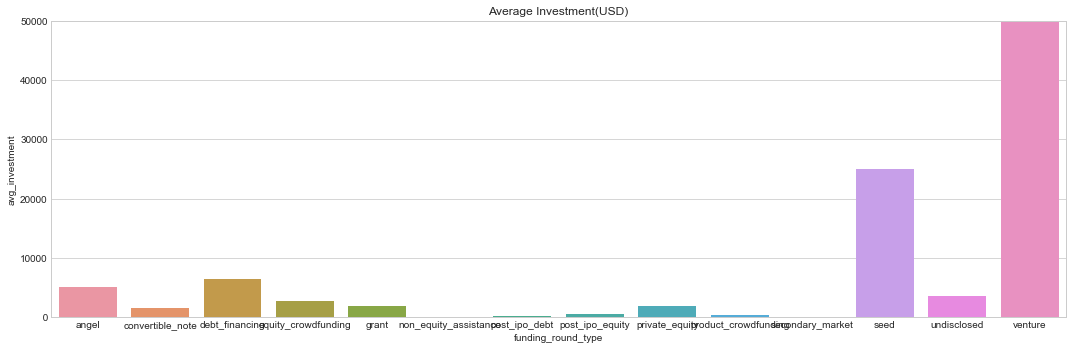

In [112]:
#plt.figure(figsize=(13, 16))
ax  = plt.subplot(2,2, 2)
sns.barplot(x='funding_round_type', y='avg_investment', data=investment)
plt.title("Average Investment(USD)")
plt.ylim(ymax = 50000)
y_fmt = tick.FormatStrFormatter('%2.0f')
ax.yaxis.set_major_formatter(y_fmt)
#plt.savefig('6-1-avg-investment.png')

top 9 countries against the total amount of investments of funding type Venture

In [113]:
invest = master_frame.loc[master_frame['funding_round_type'] == 'venture'].sort_values('raised_amount_usd',ascending=False)

In [114]:
top9_country = invest.groupby('country_code')['raised_amount_usd'].sum().reset_index(name='raised_amount_sum')

In [115]:
top9_country = top9_country.sort_values('raised_amount_sum', ascending=False).head(9)

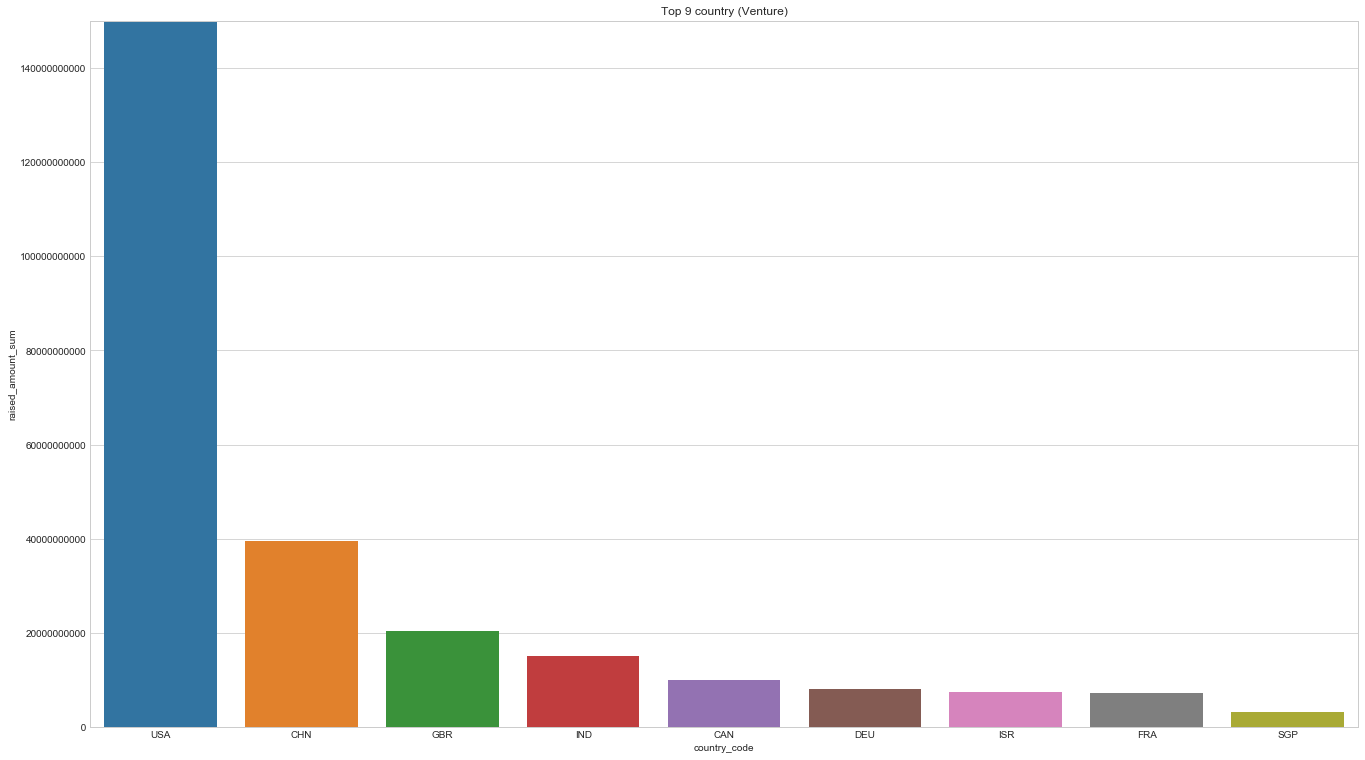

In [122]:
plt.figure(figsize=(50,13))
ax  = plt.subplot(1,2, 2)
sns.barplot(x='country_code', y='raised_amount_sum', data=top9_country)
plt.title("Top 9 country (Venture)")
plt.ylim(ymax = 150000000000)
y_fmt = tick.FormatStrFormatter('%2.0f')
ax.yaxis.set_major_formatter(y_fmt)

Number of investments in the top 3 sectors of the top 3 countries

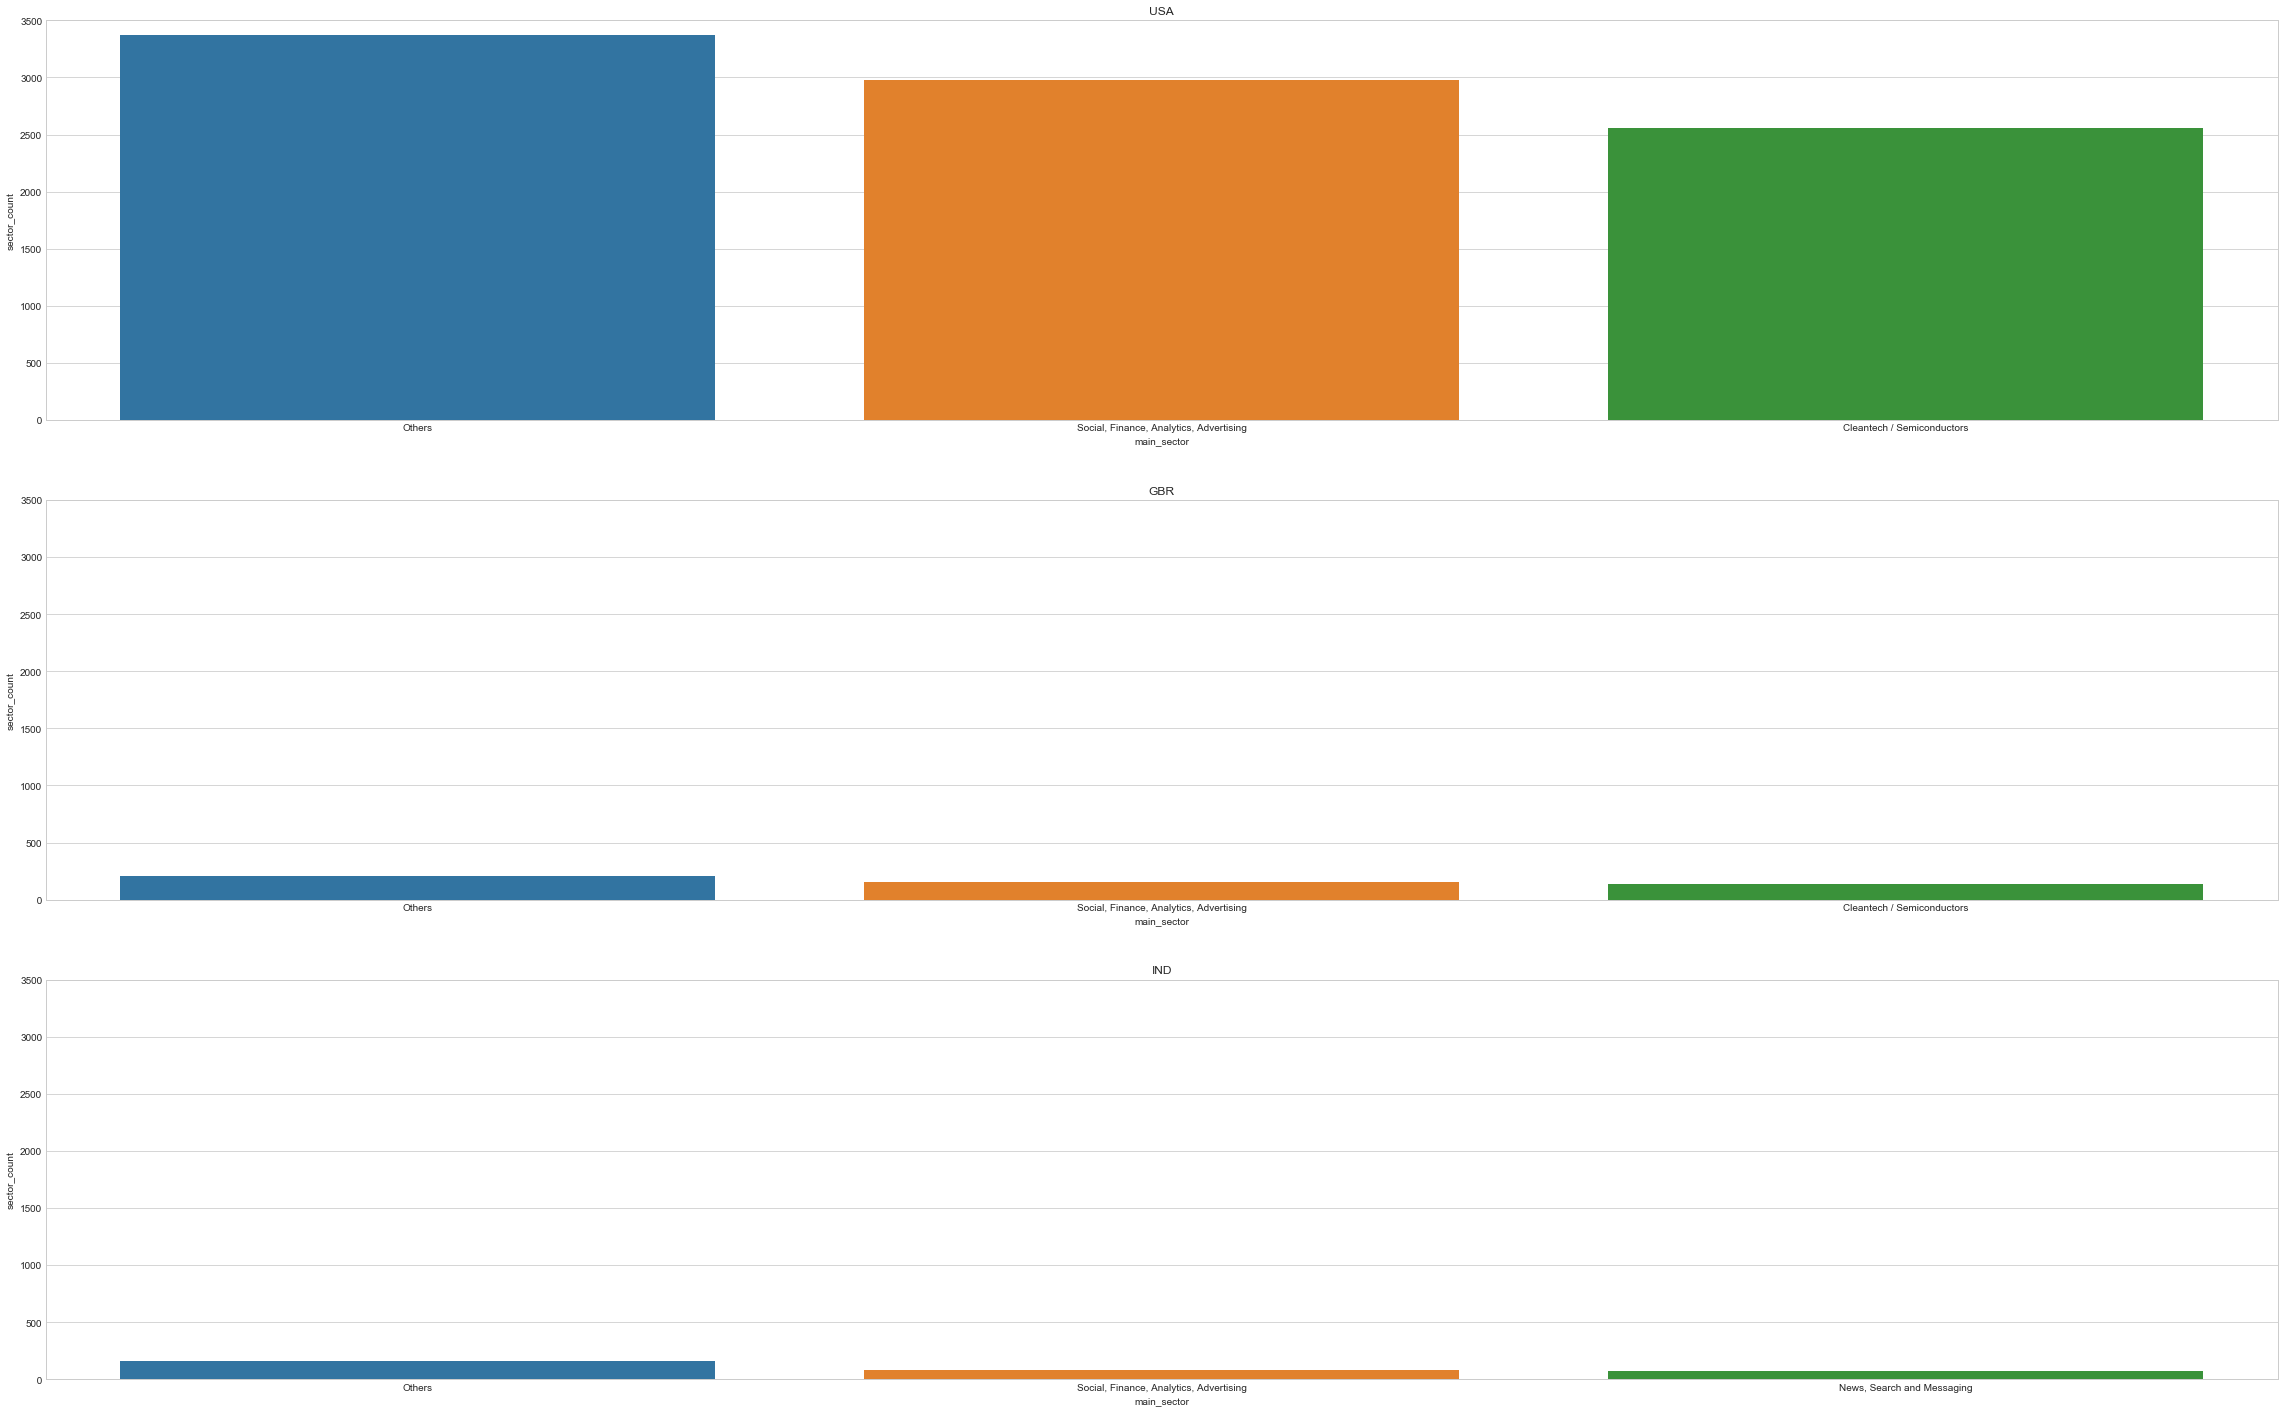

In [124]:
plt.figure(figsize=(40, 25))
# subplot 1
ax  = plt.subplot(3,1, 1)
sns.barplot(x=D1_count.sort_values('sector_count', ascending=False).main_sector[:3], y=D1_count.sort_values('sector_count', ascending=False).sector_count[:3], data=D1_count)
plt.title("USA")
plt.ylim(ymax = 3500)
y_fmt = tick.FormatStrFormatter('%2.0f')
ax.yaxis.set_major_formatter(y_fmt)
# subplot 2
ax  = plt.subplot(3,1, 2)
sns.barplot(x=D2_count.sort_values('sector_count', ascending=False).main_sector[:3], y=D2_count.sort_values('sector_count', ascending=False).sector_count[:3], data=D2_count)
plt.title("GBR")
plt.ylim(ymax = 3500)
y_fmt = tick.FormatStrFormatter('%2.0f')
ax.yaxis.set_major_formatter(y_fmt)
# subplot 3
ax  = plt.subplot(3,1, 3)
sns.barplot(x=D3_count.sort_values('sector_count', ascending=False).main_sector[:3], y=D3_count.sort_values('sector_count', ascending=False).sector_count[:3], data=D3_count)
plt.title("IND")
plt.ylim(ymax = 3500)
y_fmt = tick.FormatStrFormatter('%2.0f')
ax.yaxis.set_major_formatter(y_fmt)
